In [18]:
# Get the data.

import pandas_datareader.data as web

start = '2020-06-01'
end = '2022-02-01'

market = web.DataReader('^NSEI', 'yahoo', start, end)['Adj Close'].rename('MARKET')
tc = web.DataReader('TATACOFFEE.NS', 'yahoo', start, end)['Adj Close'].rename('TATA COFFEE')
tm = web.DataReader('TATAMOTORS.NS', 'yahoo', start, end)['Adj Close'].rename('TATA MOTORS')
ts = web.DataReader('TATASTEEL.NS', 'yahoo', start, end)['Adj Close'].rename('TATA STEEL')
cp = web.DataReader('CIPLA.NS', 'yahoo', start, end)['Adj Close'].rename('CIPLA')
al = web.DataReader('ASHOKLEY.NS', 'yahoo', start, end)['Adj Close'].rename('ASHOK LEYLAND')
itc = web.DataReader('ITC.NS', 'yahoo', start, end)['Adj Close'].rename('ITC')
tcs = web.DataReader('TCS.NS', 'yahoo', start, end)['Adj Close'].rename('TCS')
rlg = web.DataReader('RELIGARE.NS', 'yahoo', start, end)['Adj Close'].rename('RELIGARE')
ici = web.DataReader('ICICIBANK.NS', 'yahoo', start, end)['Adj Close'].rename('ICICI')
sib = web.DataReader('SOUTHBANK.NS', 'yahoo', start, end)['Adj Close'].rename('SOUTH BANK')


In [19]:
# Compile, process and save data.

from functools import reduce
import pandas as pd

data = [ market, tc, tm, ts, cp, tcs, ici ]

data = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how='inner'), data)
data = data.pct_change().drop(data.index[0]).mul(100).round(5)

# data.to_csv('daily-relative-returns.csv')

In [11]:
# Retrieve data from file

import pandas as pd

data = pd.read_csv('daily-returns.csv').set_index('Date')

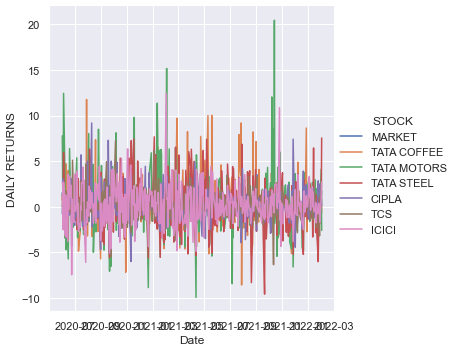

In [20]:
# Plot and see

%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

plot_data = data.reset_index().melt('Date', var_name='STOCK', value_name='DAILY RETURNS')

rcParams['figure.figsize'] = (10, 5)
sns.relplot(data=plot_data, kind='line', y='DAILY RETURNS', x='Date', hue='STOCK')

In [21]:
import numpy as np

cov_matrix = np.array(data.cov())
expected_returns = np.array(data.mean())

,MARKET,TATA COFFEE,TATA MOTORS,TATA STEEL,CIPLA,TCS,ICICI
MARKET,0.998421,0.812638,1.706228,1.354207,0.299964,0.624348,1.498011
TATA COFFEE,0.812638,6.872257,2.480168,2.110964,0.320884,0.354405,1.089336
TATA MOTORS,1.706228,2.480168,9.933645,3.142899,0.335385,0.815414,2.244054
TATA STEEL,1.354207,2.110964,3.142899,6.405001,0.662614,0.860431,1.736078
CIPLA,0.299964,0.320884,0.335385,0.662614,3.080639,0.503161,0.171530
TCS,0.624348,0.354405,0.815414,0.860431,0.503161,2.130000,0.268023
ICICI,1.498011,1.089336,2.244054,1.736078,0.171530,0.268023,4.407093


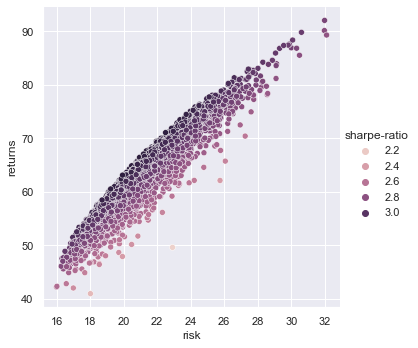

In [22]:
def portfolio_performance(weights, expected_returns, cov_matrix):
    returns = (weights.T @ expected_returns) * 252
    risk = ((weights.T @ cov_matrix @ weights) * 252)**0.5
    return returns, risk

def random_portfolios(num_assets, num_portfolios, expected_returns, cov_matrix, risk_free_rate):
    results = pd.DataFrame(columns = ['returns', 'risk', 'allocations', 'sharpe-ratio'])
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        
        returns, risk = portfolio_performance(weights, expected_returns, cov_matrix)
        
        sharpe_ratio = (returns - risk_free_rate) / risk
        allocations = (np.array(weights) * 100).round(2)
        results.loc[results.shape[0]] = [returns, risk, allocations, sharpe_ratio]
        
    return results, weights_record

(results, _) = random_portfolios(7, 5000, expected_returns, cov_matrix, 0.017)

sns.set_theme()
sns.relplot(data=results, x='risk', y='returns', hue='sharpe-ratio')


In [23]:
import altair as alt

alt.Chart(results.sample(5000)).mark_circle(size=20).encode(
    x='risk', y='returns', color='sharpe-ratio', tooltip=['allocations', 'risk', 'returns', 'sharpe-ratio']).interactive()

alt.Chart(...)

In [28]:
results[results['sharpe-ratio'] == results['sharpe-ratio'].max()]

In [32]:
results[results['returns'] == results['returns'].min()]